Image data shape (1797, 64)
Label data shape (1797,)
(1383, 64) (414, 64) (1383,) (414,)
Accuracy: 0.9492753623188406
Confusion Matrix:
 [[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


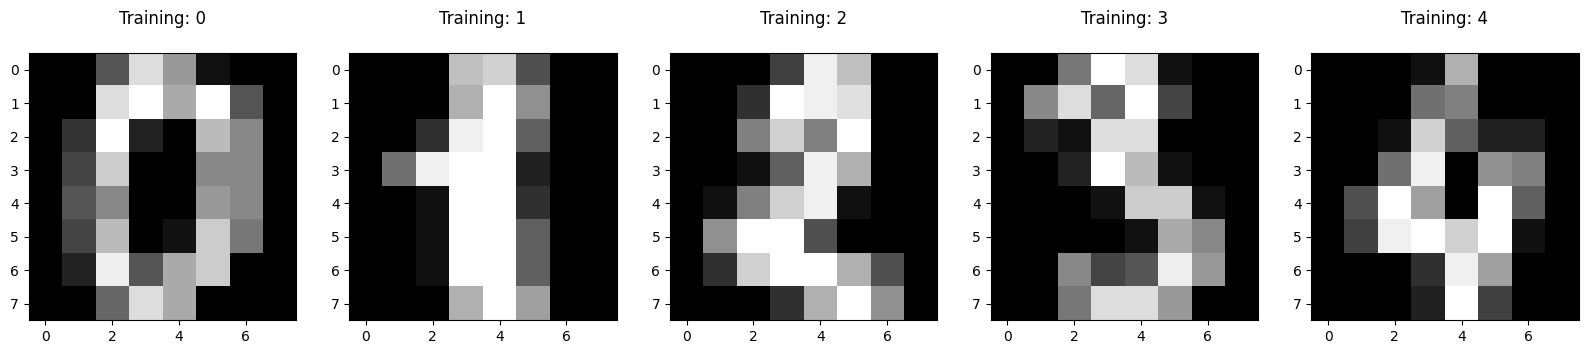

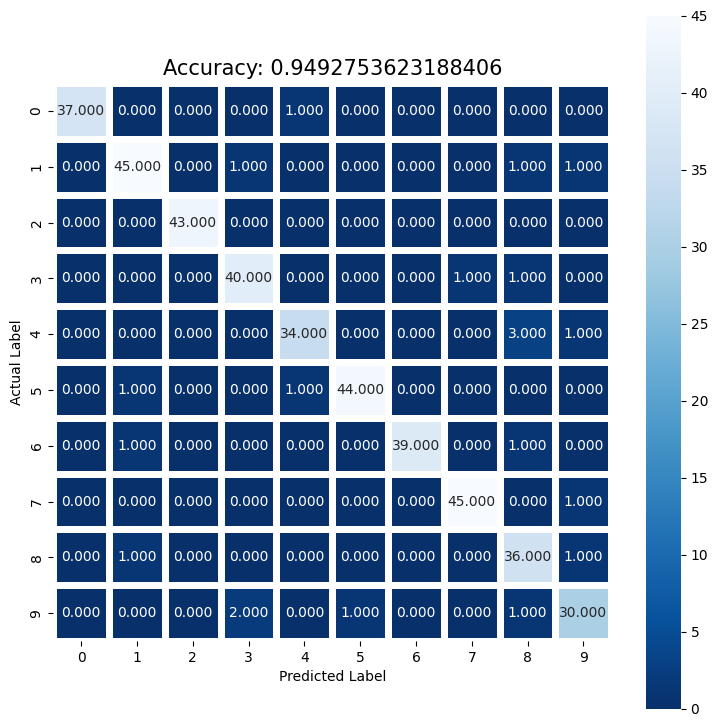

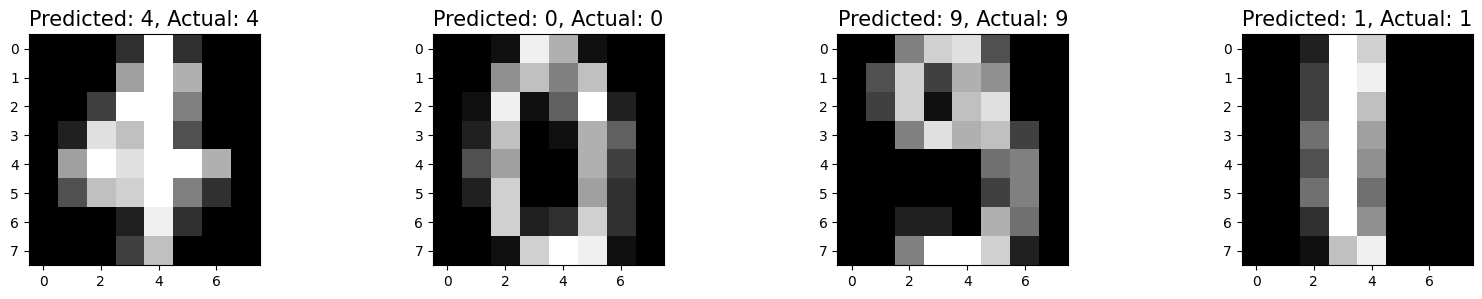

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Ensure inline plotting
%matplotlib inline

# Load dataset
digits = load_digits()
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

# Visualize first 5 images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Train the model
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train, Y_train)

# Predict test set
predictions = logisticRegression.predict(X_test)

# Accuracy score
score = logisticRegression.score(X_test, Y_test)
print("Accuracy:", score)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, predictions)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=5, square=True, cmap='Blues_r')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title('Accuracy: {0}'.format(score), size=15)
plt.show()

# ADDING CODE FROM YOUR IMAGE – Show misclassified images
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, Y_test):
    if predict == actual:
        misclassifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], Y_test[wrong]), fontsize=15)
